## Imports

In [1]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Programs

In [2]:
def mrate (m):
    rate = (m[1]/(m[1] + m[0])) * 100
    print('30 Day Mortality Rate (pct):', rate)
    
def rrate (r):
    rate = (r[1]/(r[1] + r[0])) * 100
    print('30 Day Readmission Rate (pct):', rate)

## Data Prep

In [3]:
df = pd.read_csv('vascular_all_psm_open.csv')

In [4]:
df.shape

(16296, 37)

In [5]:
df.head()

personid                           encounterid  \
0  01ccb638-fb80-4df6-bd15-85afd08383cb  0285d534-6ee1-4c09-9159-14970a332b4b   
1  0319c998-9c50-4519-888a-22de74eda082  e793c552-6631-4903-b575-690bc5dec1a2   
2  05299f3c-e07e-43c2-8423-1a4884bb729d  9a99fa52-a7ff-4bc6-b766-c1bfa2e148e5   
3  060e39f2-e414-47c8-8c8e-59b6f1d0cc4d  2e868d04-30c4-47c9-bf48-76abf38a9f80   
4  08fa8a89-504c-4276-bfda-125e7051b9df  bae29f9d-cb9a-45ab-ab10-aa503b7bbe56   

   pre_albumin  early_albumin  late_albumin  albumin  ICU   LOS_days  \
0            0              0             0        0    0  13.031250   
1            0              0             0        0    1  21.836111   
2            0              0             1        1    0   2.158333   
3            0              0             0        0    1   3.661111   
4            0              0             0        0    0  18.735266   

   90_day_mortality  90_day_readmission  hospital_free_days   age sex   race  \
0                 0                 1.0                  76  57.0   M  White   
1                 0                 0.0                  69  79.0   F  White   
2                 0                 0.0                  88  61.0   M  White   
3                 0                 0.0                  87  71.0   F  White   
4                 0                 1.0                  11  46.0   F  Other   

   CCI  preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
0    0                  0                   0        1            NaN   
1    3                  0                   0        1            NaN   
2    2                  0                   0        0            NaN   
3    3                  0                   0        0            NaN   
4    4                  0                   0        0            NaN   

  preop_albumin_classification  postop_albumin  preop_inr  \
0                          NaN             NaN        NaN   
1                          NaN             NaN        NaN   
2                          NaN             NaN        1.0   
3                          NaN             NaN        1.0   
4                          NaN             NaN        1.0   

  preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
0                   Unkown        NaN                  Unknown            0   
1                   Unkown       3.20                     High            0   
2                   Normal        NaN                  Unknown            0   
3                   Normal       0.95                   Normal            0   
4                   Normal       0.47                      Low            0   

   non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP        eGFR  \
0           1.0            0     0                0          0   12.484893   
1           1.0            0     0                1          0   13.120631   
2           0.0            0     1                1          0   72.070695   
3           1.0            0     0                1          0   60.258626   
4           1.0            0     2                1          0  118.453905   

    eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0        Kidney Failure    0       7.6               7.0 - 7.9        1  
1        Kidney Failure    0       9.8                  >= 9.0        1  
2  Early Kidney Disease    0      15.3                  >= 9.0        1  
3  Early Kidney Disease    0       NaN                 Unknown        1  
4                Normal    1       7.9               7.0 - 7.9        1

In [6]:
df = df[df['non_elective'] == 0]

In [7]:
df.shape

(3374, 37)

In [8]:
df.head()

personid  \
2   05299f3c-e07e-43c2-8423-1a4884bb729d   
17  3971f1ca-183b-44ac-ad87-3b3ccd19d786   
26  5dbe32a0-8447-4216-84f9-87f04e8386a9   
28  62b58dad-1cde-4bab-a2fe-760065b8db57   
31  6b1a1a1f-503f-4ec9-9a49-d91eb949fccb   

                             encounterid  pre_albumin  early_albumin  \
2   9a99fa52-a7ff-4bc6-b766-c1bfa2e148e5            0              0   
17  e3ef803a-1aeb-44ff-b911-6deb626485e8            0              0   
26  cbb9a794-bf0a-4b0b-b89e-ddc4bb33be5b            0              0   
28  8553c1f0-438f-4e39-b24d-a7b4c740c965            0              0   
31  30fefa5e-0751-4052-92f6-db6b66a200e6            0              0   

    late_albumin  albumin  ICU   LOS_days  90_day_mortality  \
2              1        1    0   2.158333                 0   
17             0        0    0  21.422917                 0   
26             0        0    0   7.801042                 1   
28             0        0    0   2.416667                 1   
31             0        0    0   3.509722                 0   

    90_day_readmission  hospital_free_days   age sex   race  CCI  \
2                  0.0                  88  61.0   M  White    2   
17                 1.0                  54  75.0   F  White    6   
26                 NaN                   0  71.0   M  White    7   
28                 NaN                   0  84.0   F  White    4   
31                 0.0                  84  71.0   M  White    2   

    preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
2                   0                   0        0            NaN   
17                  0                   1        1            3.5   
26                  0                   1        1            NaN   
28                  0                   0        1            NaN   
31                  0                   0        0            NaN   

   preop_albumin_classification  postop_albumin  preop_inr  \
2                           NaN             NaN        1.0   
17                       Normal             NaN        NaN   
26                          NaN             NaN        NaN   
28                          NaN             NaN        NaN   
31                          NaN             NaN        0.9   

   preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
2                    Normal        NaN                  Unknown            0   
17                   Unkown        0.8                   Normal            0   
26                   Unkown       10.1                     High            1   
28                   Unkown        NaN                  Unknown            0   
31                   Normal        0.8                   Normal            0   

    non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP       eGFR  \
2            0.0            0     1                1          0  72.070695   
17           0.0            0     0                1          0  72.118762   
26           0.0            0     1                1          0   4.603312   
28           0.0            1     3                1          0        NaN   
31           0.0            0     3                0          0  89.875112   

     eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
2   Early Kidney Disease    0      15.3                  >= 9.0        1  
17  Early Kidney Disease    0       9.4                  >= 9.0        1  
26        Kidney Failure    0      10.9                  >= 9.0        1  
28                   NaN    0       NaN                 Unknown        1  
31  Early Kidney Disease    0      15.3                  >= 9.0        1

In [9]:
df.columns

Index(['personid', 'encounterid', 'pre_albumin', 'early_albumin',
       'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality',
       '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI',
       'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin',
       'preop_albumin_classification', 'postop_albumin', 'preop_inr',
       'preop_inr_classification', 'preop_scr', 'preop_scr_classification',
       'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension',
       'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb',
       'preop_hb_classification', 'open_pr'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3374 entries, 2 to 16287
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   personid                      3374 non-null   object 
 1   encounterid                   3374 non-null   object 
 2   pre_albumin                   3374 non-null   int64  
 3   early_albumin                 3374 non-null   int64  
 4   late_albumin                  3374 non-null   int64  
 5   albumin                       3374 non-null   int64  
 6   ICU                           3374 non-null   int64  
 7   LOS_days                      3374 non-null   float64
 8   90_day_mortality              3374 non-null   int64  
 9   90_day_readmission            3230 non-null   float64
 10  hospital_free_days            3374 non-null   int64  
 11  age                           3374 non-null   float64
 12  sex                           3369 non-null   object 
 13  ra

In [11]:
df.isnull().sum()

personid                           0
encounterid                        0
pre_albumin                        0
early_albumin                      0
late_albumin                       0
albumin                            0
ICU                                0
LOS_days                           0
90_day_mortality                   0
90_day_readmission               144
hospital_free_days                 0
age                                0
sex                                5
race                             128
CCI                                0
preop_hypotension                  0
postop_hypotension                 0
MAKE_90                            0
preop_albumin                   3001
preop_albumin_classification    3001
postop_albumin                  3097
preop_inr                       2770
preop_inr_classification           0
preop_scr                       2067
preop_scr_classification           0
transfusion                        0
non_elective                       0
v

In [12]:
df.early_albumin.value_counts()

0    3267
1     107
Name: early_albumin, dtype: int64

## Look at outcomes distributions between patients who did and didn't receive albumin within 24 hrs

In [13]:
df[df['early_albumin'] == 1].LOS_days.describe()

count    107.000000
mean       8.413977
std       10.693604
min        0.000000
25%        3.184028
50%        5.602083
75%        8.968403
max       74.781250
Name: LOS_days, dtype: float64

In [14]:
df[df['early_albumin'] == 0].LOS_days.describe()

count    3267.000000
mean        7.772860
std        13.168357
min         0.000000
25%         2.315260
50%         5.146528
75%         9.426435
max       526.570139
Name: LOS_days, dtype: float64

In [15]:
df[df['albumin'] == 1].CCI.describe()

count    739.000000
mean       3.312585
std        2.351495
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       14.000000
Name: CCI, dtype: float64

In [16]:
df[df['albumin'] == 0].CCI.describe()

count    2635.000000
mean        2.921063
std         2.106286
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: CCI, dtype: float64

In [17]:
om = df[df['early_albumin'] == 1]['90_day_mortality'].value_counts()
print(om)
mrate(om)

0    94
1    13
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 12.149532710280374


In [18]:
om1 = df[df['early_albumin'] == 0]['90_day_mortality'].value_counts()
print(om1)
mrate(om1)

0    3136
1     131
Name: 90_day_mortality, dtype: int64
30 Day Mortality Rate (pct): 4.009794918885827


In [19]:
ir = df[df['early_albumin'] == 1]['90_day_readmission'].value_counts()
print(ir)
mrate(ir)

1.0    54
0.0    40
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 57.446808510638306


In [20]:
ir1 = df[df['early_albumin'] == 0]['90_day_readmission'].value_counts()
print(ir1)
mrate(ir1)

0.0    1958
1.0    1178
Name: 90_day_readmission, dtype: int64
30 Day Mortality Rate (pct): 37.56377551020408


In [21]:
df.head()

personid  \
2   05299f3c-e07e-43c2-8423-1a4884bb729d   
17  3971f1ca-183b-44ac-ad87-3b3ccd19d786   
26  5dbe32a0-8447-4216-84f9-87f04e8386a9   
28  62b58dad-1cde-4bab-a2fe-760065b8db57   
31  6b1a1a1f-503f-4ec9-9a49-d91eb949fccb   

                             encounterid  pre_albumin  early_albumin  \
2   9a99fa52-a7ff-4bc6-b766-c1bfa2e148e5            0              0   
17  e3ef803a-1aeb-44ff-b911-6deb626485e8            0              0   
26  cbb9a794-bf0a-4b0b-b89e-ddc4bb33be5b            0              0   
28  8553c1f0-438f-4e39-b24d-a7b4c740c965            0              0   
31  30fefa5e-0751-4052-92f6-db6b66a200e6            0              0   

    late_albumin  albumin  ICU   LOS_days  90_day_mortality  \
2              1        1    0   2.158333                 0   
17             0        0    0  21.422917                 0   
26             0        0    0   7.801042                 1   
28             0        0    0   2.416667                 1   
31             0        0    0   3.509722                 0   

    90_day_readmission  hospital_free_days   age sex   race  CCI  \
2                  0.0                  88  61.0   M  White    2   
17                 1.0                  54  75.0   F  White    6   
26                 NaN                   0  71.0   M  White    7   
28                 NaN                   0  84.0   F  White    4   
31                 0.0                  84  71.0   M  White    2   

    preop_hypotension  postop_hypotension  MAKE_90  preop_albumin  \
2                   0                   0        0            NaN   
17                  0                   1        1            3.5   
26                  0                   1        1            NaN   
28                  0                   0        1            NaN   
31                  0                   0        0            NaN   

   preop_albumin_classification  postop_albumin  preop_inr  \
2                           NaN             NaN        1.0   
17                       Normal             NaN        NaN   
26                          NaN             NaN        NaN   
28                          NaN             NaN        NaN   
31                          NaN             NaN        0.9   

   preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
2                    Normal        NaN                  Unknown            0   
17                   Unkown        0.8                   Normal            0   
26                   Unkown       10.1                     High            1   
28                   Unkown        NaN                  Unknown            0   
31                   Normal        0.8                   Normal            0   

    non_elective  vasopressor  NEWS  bl_hypertension  preop_MAP       eGFR  \
2            0.0            0     1                1          0  72.070695   
17           0.0            0     0                1          0  72.118762   
26           0.0            0     1                1          0   4.603312   
28           0.0            1     3                1          0        NaN   
31           0.0            0     3                0          0  89.875112   

     eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
2   Early Kidney Disease    0      15.3                  >= 9.0        1  
17  Early Kidney Disease    0       9.4                  >= 9.0        1  
26        Kidney Failure    0      10.9                  >= 9.0        1  
28                   NaN    0       NaN                 Unknown        1  
31  Early Kidney Disease    0      15.3                  >= 9.0        1

In [22]:
print(df.columns.tolist())

['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'age', 'sex', 'race', 'CCI', 'preop_hypotension', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'vasopressor', 'NEWS', 'bl_hypertension', 'preop_MAP', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [23]:
df_a24 = df[['personid', 'encounterid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']]

In [24]:
df_a24.head()

personid  \
2   05299f3c-e07e-43c2-8423-1a4884bb729d   
17  3971f1ca-183b-44ac-ad87-3b3ccd19d786   
26  5dbe32a0-8447-4216-84f9-87f04e8386a9   
28  62b58dad-1cde-4bab-a2fe-760065b8db57   
31  6b1a1a1f-503f-4ec9-9a49-d91eb949fccb   

                             encounterid  pre_albumin  early_albumin  \
2   9a99fa52-a7ff-4bc6-b766-c1bfa2e148e5            0              0   
17  e3ef803a-1aeb-44ff-b911-6deb626485e8            0              0   
26  cbb9a794-bf0a-4b0b-b89e-ddc4bb33be5b            0              0   
28  8553c1f0-438f-4e39-b24d-a7b4c740c965            0              0   
31  30fefa5e-0751-4052-92f6-db6b66a200e6            0              0   

    late_albumin  ICU   LOS_days  90_day_mortality  90_day_readmission  \
2              1    0   2.158333                 0                 0.0   
17             0    0  21.422917                 0                 1.0   
26             0    0   7.801042                 1                 NaN   
28             0    0   2.416667                 1                 NaN   
31             0    0   3.509722                 0                 0.0   

    hospital_free_days  vasopressor sex   race  postop_hypotension  MAKE_90  \
2                   88            0   M  White                   0        0   
17                  54            0   F  White                   1        1   
26                   0            0   M  White                   1        1   
28                   0            1   F  White                   0        1   
31                  84            0   M  White                   0        0   

    preop_albumin preop_albumin_classification  postop_albumin  preop_inr  \
2             NaN                          NaN             NaN        1.0   
17            3.5                       Normal             NaN        NaN   
26            NaN                          NaN             NaN        NaN   
28            NaN                          NaN             NaN        NaN   
31            NaN                          NaN             NaN        0.9   

   preop_inr_classification  preop_scr preop_scr_classification  transfusion  \
2                    Normal        NaN                  Unknown            0   
17                   Unkown        0.8                   Normal            0   
26                   Unkown       10.1                     High            1   
28                   Unkown        NaN                  Unknown            0   
31                   Normal        0.8                   Normal            0   

    non_elective       eGFR   eGFR_classification  LVR  preop_hb  \
2            0.0  72.070695  Early Kidney Disease    0      15.3   
17           0.0  72.118762  Early Kidney Disease    0       9.4   
26           0.0   4.603312        Kidney Failure    0      10.9   
28           0.0        NaN                   NaN    0       NaN   
31           0.0  89.875112  Early Kidney Disease    0      15.3   

   preop_hb_classification  open_pr  
2                   >= 9.0        1  
17                  >= 9.0        1  
26                  >= 9.0        1  
28                 Unknown        1  
31                  >= 9.0        1

In [25]:
# remove vasopressor variable - it is an outcome

df.drop(columns=['personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr'], inplace=True)

In [26]:
df.shape

(3374, 8)

In [27]:
df.head()

encounterid  albumin   age  CCI  \
2   9a99fa52-a7ff-4bc6-b766-c1bfa2e148e5        1  61.0    2   
17  e3ef803a-1aeb-44ff-b911-6deb626485e8        0  75.0    6   
26  cbb9a794-bf0a-4b0b-b89e-ddc4bb33be5b        0  71.0    7   
28  8553c1f0-438f-4e39-b24d-a7b4c740c965        0  84.0    4   
31  30fefa5e-0751-4052-92f6-db6b66a200e6        0  71.0    2   

    preop_hypotension  NEWS  bl_hypertension  preop_MAP  
2                   0     1                1          0  
17                  0     0                1          0  
26                  0     1                1          0  
28                  0     3                1          0  
31                  0     3                0          0

In [28]:
df.isnull().sum()

encounterid          0
albumin              0
age                  0
CCI                  0
preop_hypotension    0
NEWS                 0
bl_hypertension      0
preop_MAP            0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(3374, 8)

In [31]:
df.albumin.value_counts()

0    2635
1     739
Name: albumin, dtype: int64

In [32]:
df.head()

encounterid  albumin   age  CCI  \
2   9a99fa52-a7ff-4bc6-b766-c1bfa2e148e5        1  61.0    2   
17  e3ef803a-1aeb-44ff-b911-6deb626485e8        0  75.0    6   
26  cbb9a794-bf0a-4b0b-b89e-ddc4bb33be5b        0  71.0    7   
28  8553c1f0-438f-4e39-b24d-a7b4c740c965        0  84.0    4   
31  30fefa5e-0751-4052-92f6-db6b66a200e6        0  71.0    2   

    preop_hypotension  NEWS  bl_hypertension  preop_MAP  
2                   0     1                1          0  
17                  0     0                1          0  
26                  0     1                1          0  
28                  0     3                1          0  
31                  0     3                0          0

## Initialize PsmPy Class

In [33]:
# adding only non-elective == 1
# adding age variable

psm = PsmPy(df, treatment= 'albumin', indx='encounterid')

In [34]:
%%time
psm.logistic_ps(balance = True)

Wall time: 1.42 s


In [35]:
df_psm = psm.predicted_data

In [36]:
df_psm.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  9a99fa52-a7ff-4bc6-b766-c1bfa2e148e5  61.0    2                  0     1   
1  5c4f7c23-f972-482d-be0a-c3ca4832956f  51.0    3                  1     4   
2  e9e4b54e-7b44-4b06-be68-d4d994d3a11c  75.0    1                  0     4   
3  f5fc38c9-ee43-4efd-ac45-42a536fddcd0  77.0    0                  0     3   
4  b1fe6209-4c7b-4087-804b-8c86fcd9ed46  75.0    2                  1     4   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.434516         -0.263450        1  
1                1          1          0.836683          1.633750        1  
2                1          0          0.432854         -0.270217        1  
3                0          0          0.402912         -0.393348        1  
4                1          1          0.781332          1.273444        1

## Plot the propensity score / propensity logits

In [37]:
%%time
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Wall time: 15.2 s


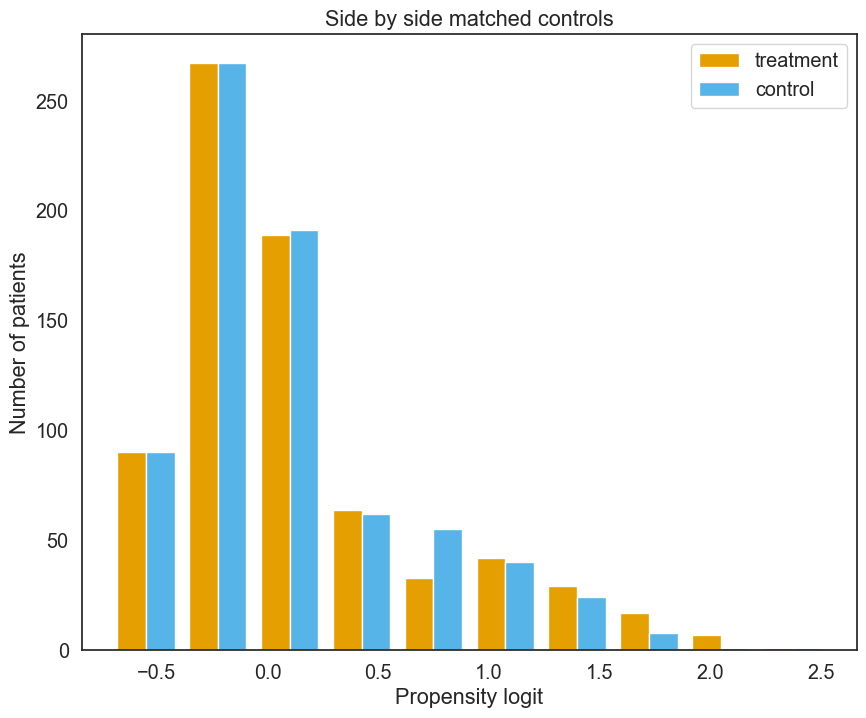

In [38]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

## Plot the effect sizes

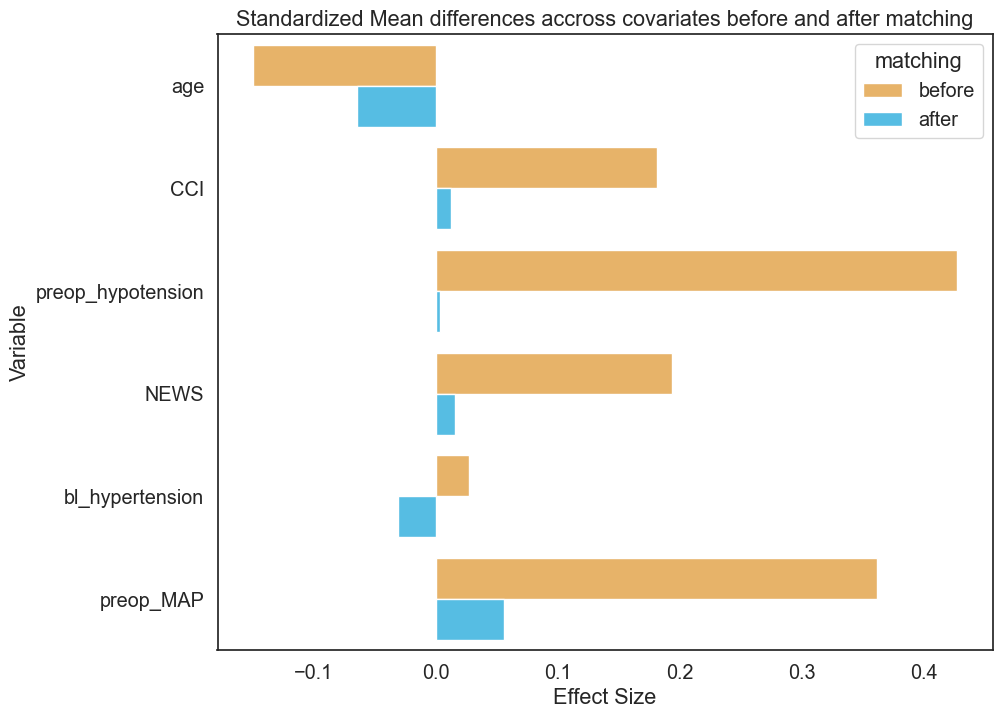

In [39]:
psm.effect_size_plot(save=False)

## Raw Dataframe

In [40]:
matched_df = psm.df_matched

In [41]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  9a99fa52-a7ff-4bc6-b766-c1bfa2e148e5  61.0    2                  0     1   
1  5c4f7c23-f972-482d-be0a-c3ca4832956f  51.0    3                  1     4   
2  e9e4b54e-7b44-4b06-be68-d4d994d3a11c  75.0    1                  0     4   
3  f5fc38c9-ee43-4efd-ac45-42a536fddcd0  77.0    0                  0     3   
4  b1fe6209-4c7b-4087-804b-8c86fcd9ed46  75.0    2                  1     4   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.434516         -0.263450        1  
1                1          1          0.836683          1.633750        1  
2                1          0          0.432854         -0.270217        1  
3                0          0          0.402912         -0.393348        1  
4                1          1          0.781332          1.273444        1

In [42]:
matched_df.shape

(1478, 10)

## Matched Ids

In [43]:
ids_df = psm.matched_ids
ids_df.head()

encounterid                            matched_ID
0  9a99fa52-a7ff-4bc6-b766-c1bfa2e148e5  2eeca9d3-490f-4663-8567-98b7eb218ba6
1  5c4f7c23-f972-482d-be0a-c3ca4832956f  ad0a5d32-5fa5-4c1b-9203-e49c759c56cf
2  e9e4b54e-7b44-4b06-be68-d4d994d3a11c  f25f171e-86f2-457b-a3e0-6269a2726b2d
3  f5fc38c9-ee43-4efd-ac45-42a536fddcd0  a37285d8-a1e2-4068-bd19-e942c070b0d0
4  b1fe6209-4c7b-4087-804b-8c86fcd9ed46  4c17e5ee-cb04-48be-803a-015d9791325a

## Effect sizes per variables

In [44]:
psm.effect_size

Variable matching  Effect Size
0                 age   before    -0.149814
1                 age    after    -0.064488
2                 CCI   before     0.181065
3                 CCI    after     0.012739
4   preop_hypotension   before     0.427134
5   preop_hypotension    after     0.003724
6                NEWS   before     0.193170
7                NEWS    after     0.016134
8     bl_hypertension   before     0.027357
9     bl_hypertension    after    -0.030931
10          preop_MAP   before     0.361725
11          preop_MAP    after     0.056162

## Explore Matched df

In [45]:
matched_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  9a99fa52-a7ff-4bc6-b766-c1bfa2e148e5  61.0    2                  0     1   
1  5c4f7c23-f972-482d-be0a-c3ca4832956f  51.0    3                  1     4   
2  e9e4b54e-7b44-4b06-be68-d4d994d3a11c  75.0    1                  0     4   
3  f5fc38c9-ee43-4efd-ac45-42a536fddcd0  77.0    0                  0     3   
4  b1fe6209-4c7b-4087-804b-8c86fcd9ed46  75.0    2                  1     4   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  
0                1          0          0.434516         -0.263450        1  
1                1          1          0.836683          1.633750        1  
2                1          0          0.432854         -0.270217        1  
3                0          0          0.402912         -0.393348        1  
4                1          1          0.781332          1.273444        1

In [46]:
matched_df.albumin.value_counts()

1    739
0    739
Name: albumin, dtype: int64

In [47]:
matched_df.shape

(1478, 10)

## Join Matched df with earlier df on encounterid to add outcome variables

In [48]:
f_df = matched_df.merge(df_a24, on='encounterid', how='left')

In [49]:
f_df.shape

(1478, 39)

In [50]:
f_df.head()

encounterid   age  CCI  preop_hypotension  NEWS  \
0  9a99fa52-a7ff-4bc6-b766-c1bfa2e148e5  61.0    2                  0     1   
1  5c4f7c23-f972-482d-be0a-c3ca4832956f  51.0    3                  1     4   
2  e9e4b54e-7b44-4b06-be68-d4d994d3a11c  75.0    1                  0     4   
3  f5fc38c9-ee43-4efd-ac45-42a536fddcd0  77.0    0                  0     3   
4  b1fe6209-4c7b-4087-804b-8c86fcd9ed46  75.0    2                  1     4   

   bl_hypertension  preop_MAP  propensity_score  propensity_logit  albumin  \
0                1          0          0.434516         -0.263450        1   
1                1          1          0.836683          1.633750        1   
2                1          0          0.432854         -0.270217        1   
3                0          0          0.402912         -0.393348        1   
4                1          1          0.781332          1.273444        1   

                               personid  pre_albumin  early_albumin  \
0  05299f3c-e07e-43c2-8423-1a4884bb729d            0              0   
1  95071a77-97fc-4d11-afd2-794309e973ab            1              0   
2  9bc31235-744d-4a82-941f-ded33f9cceaa            0              0   
3  b099d5a9-4ec3-47db-84bb-f594b0821832            1              0   
4  c5a222c1-5488-44c7-b45e-39a693a11670            1              0   

   late_albumin  ICU   LOS_days  90_day_mortality  90_day_readmission  \
0             1    0   2.158333                 0                 0.0   
1             1    0   4.352083                 1                 NaN   
2             1    0   8.183333                 0                 0.0   
3             0    0   3.565301                 0                 1.0   
4             1    0  13.511111                 0                 0.0   

   hospital_free_days  vasopressor sex                    race  \
0                  88            0   M                   White   
1                   0            0   F  Asian/Pacific Islander   
2                  74            0   M                   White   
3                  79            0   M                   Other   
4                  74            0   M                   White   

   postop_hypotension  MAKE_90  preop_albumin preop_albumin_classification  \
0                   0        0            NaN                          NaN   
1                   0        1            NaN                          NaN   
2                   0        0            NaN                          NaN   
3                   0        0            NaN                          NaN   
4                   1        1            3.5                       Normal   

   postop_albumin  preop_inr preop_inr_classification  preop_scr  \
0             NaN       1.00                   Normal        NaN   
1             NaN        NaN                   Unkown       1.90   
2             NaN        NaN                   Unkown       0.86   
3             NaN       1.32                   Normal       0.79   
4             NaN       1.30                   Normal       1.17   

  preop_scr_classification  transfusion  non_elective       eGFR  \
0                  Unknown            0           0.0  72.070695   
1                     High            0           0.0  29.997771   
2                   Normal            0           0.0  84.825721   
3                   Normal            0           0.0  86.612422   
4                   Normal            0           0.0  60.625487   

    eGFR_classification  LVR  preop_hb preop_hb_classification  open_pr  
0  Early Kidney Disease    0      15.3                  >= 9.0        1  
1        Kidney Disease    0       8.7               8.0 - 8.9        1  
2  Early Kidney Disease    0      12.8                  >= 9.0        1  
3  Early Kidney Disease    1       9.1                  >= 9.0        1  
4  Early Kidney Disease    0      16.4                  >= 9.0        1

In [51]:
print(f_df.columns.tolist())

['encounterid', 'age', 'CCI', 'preop_hypotension', 'NEWS', 'bl_hypertension', 'preop_MAP', 'propensity_score', 'propensity_logit', 'albumin', 'personid', 'pre_albumin', 'early_albumin', 'late_albumin', 'ICU', 'LOS_days', '90_day_mortality', '90_day_readmission', 'hospital_free_days', 'vasopressor', 'sex', 'race', 'postop_hypotension', 'MAKE_90', 'preop_albumin', 'preop_albumin_classification', 'postop_albumin', 'preop_inr', 'preop_inr_classification', 'preop_scr', 'preop_scr_classification', 'transfusion', 'non_elective', 'eGFR', 'eGFR_classification', 'LVR', 'preop_hb', 'preop_hb_classification', 'open_pr']


In [52]:
f_df.albumin.value_counts()

1    739
0    739
Name: albumin, dtype: int64

In [53]:
f_df[f_df['early_albumin'] == 1].LOS_days.describe()

count    107.000000
mean       8.413977
std       10.693604
min        0.000000
25%        3.184028
50%        5.602083
75%        8.968403
max       74.781250
Name: LOS_days, dtype: float64

In [54]:
f_df[f_df['early_albumin'] == 0].LOS_days.describe()

count    1371.000000
mean        9.790064
std        18.330433
min         0.000000
25%         3.019792
50%         6.425972
75%        11.358333
max       526.570139
Name: LOS_days, dtype: float64

In [55]:
ea_df = f_df[f_df['early_albumin'] == 1]
nea_df = f_df[f_df['early_albumin'] == 0]

In [56]:
m = ea_df['90_day_mortality'].value_counts()
print(m)

0    94
1    13
Name: 90_day_mortality, dtype: int64


In [57]:
mrate(m)

30 Day Mortality Rate (pct): 12.149532710280374


In [58]:
m1 = nea_df['90_day_mortality'].value_counts()
print(m1)

0    1293
1      78
Name: 90_day_mortality, dtype: int64


In [59]:
mrate(m1)

30 Day Mortality Rate (pct): 5.689277899343545


In [60]:
r = ea_df['90_day_readmission'].value_counts()
print(r)

1.0    54
0.0    40
Name: 90_day_readmission, dtype: int64


In [61]:
rrate(r)

30 Day Readmission Rate (pct): 57.446808510638306


In [62]:
r1 = nea_df['90_day_readmission'].value_counts()
print(r1)

0.0    780
1.0    513
Name: 90_day_readmission, dtype: int64


In [63]:
rrate(r1)

30 Day Readmission Rate (pct): 39.675174013921115


In [64]:
a_df = f_df[f_df['albumin'] == 1]
na_df = f_df[f_df['albumin'] == 0]

In [65]:
a_df['CCI'].describe()

count    739.000000
mean       3.312585
std        2.351495
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       14.000000
Name: CCI, dtype: float64

In [66]:
na_df['CCI'].describe()

count    739.000000
mean       3.282815
std        2.322242
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       13.000000
Name: CCI, dtype: float64

In [67]:
a_df['age'].describe()

count    739.000000
mean      64.338295
std       15.587128
min        0.000000
25%       58.000000
50%       67.000000
75%       74.000000
max       88.000000
Name: age, dtype: float64

In [68]:
na_df['age'].describe()

count    739.000000
mean      65.301759
std       14.263761
min        0.000000
25%       59.000000
50%       67.000000
75%       75.000000
max       89.000000
Name: age, dtype: float64

In [69]:
a_df['preop_hypotension'].value_counts()

0    623
1    116
Name: preop_hypotension, dtype: int64

In [70]:
na_df['preop_hypotension'].value_counts()

0    624
1    115
Name: preop_hypotension, dtype: int64

In [71]:
a_df['NEWS'].describe()

count    739.000000
mean       2.140731
std        2.060522
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       13.000000
Name: NEWS, dtype: float64

In [72]:
na_df['NEWS'].describe()

count    739.000000
mean       2.108254
std        1.964226
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max       12.000000
Name: NEWS, dtype: float64

In [73]:
a_df['bl_hypertension'].value_counts()

1    465
0    274
Name: bl_hypertension, dtype: int64

In [74]:
na_df['bl_hypertension'].value_counts()

1    476
0    263
Name: bl_hypertension, dtype: int64

In [75]:
a_df['preop_MAP'].value_counts()

0    665
1     74
Name: preop_MAP, dtype: int64

In [76]:
na_df['preop_MAP'].value_counts()

0    677
1     62
Name: preop_MAP, dtype: int64

In [77]:
# f_df = df

In [78]:
f_df.albumin.value_counts()

1    739
0    739
Name: albumin, dtype: int64

In [79]:
f_df.to_csv('vascular_elective_proc_psm_221107.csv', index=False)